In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np

# **Load Dataset**

In [2]:
x_train = np.loadtxt(r'input.csv', delimiter=',')
y_train = np.loadtxt(r'labels.csv', delimiter=',')

x_test = np.loadtxt(r'input_test.csv', delimiter=',')
y_test = np.loadtxt(r'labels_test.csv', delimiter=',')

In [3]:
x_train = x_train.reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

x_test = x_test.reshape(len(x_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

x_train = x_train/255.0
x_test = x_test/255.0

In [4]:
print('Shape of x_train: ',x_train.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of x_test: ',x_test.shape)
print('Shape of y_testn: ',y_test.shape)

Shape of x_train:  (2000, 100, 100, 3)
Shape of y_train:  (2000, 1)
Shape of x_test:  (400, 100, 100, 3)
Shape of y_testn:  (400, 1)


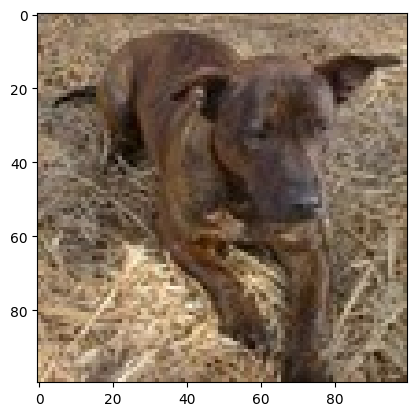

In [5]:
idx=np.random.randint(0, len(x_train))

plt.imshow(x_train[idx,:])

# Model

In [6]:
model=Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

#  Or like this 
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
# model.add(MaxPooling2D((2, 2)))
#
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# 
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

C:\Users\Manav Darji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 141ms/step - accuracy: 0.5436 - loss: 0.7102
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - accuracy: 0.6712 - loss: 0.6185
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - accuracy: 0.7516 - loss: 0.5316
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.8218 - loss: 0.4293
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - accuracy: 0.8506 - loss: 0.3453
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.8591 - loss: 0.3291
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - accuracy: 0.9298 - loss: 0.1779
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - accuracy: 0.9558 - loss: 0.1397
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.9732 - loss: 0.0786
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.9917 - loss: 0.0404
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - accuracy: 0.9850 - loss: 0.0488
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/ste

In [9]:
model.evaluate(x_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.6401 - loss: 3.3218


[2.988447904586792, 0.6625000238418579]

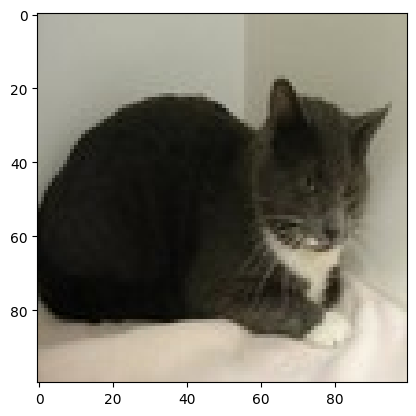

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
The image is a Cat
[[1.]]


In [12]:
idx=np.random.randint(0, len(y_test))
plt.imshow(x_test[idx,:])
plt.show()
y_pred_prob=model.predict(x_test[idx,:].reshape(1, 100, 100, 3))
y_pred=y_pred_prob>.4
if y_pred==0:
    print("The image is a Dog")
    print(y_pred_prob)
else:
    print("The image is a Cat")
    print(y_pred_prob)

In [76]:
import pickle
model_pickle = pickle.dumps(model)
with open('model.pickle', 'wb') as f:
    f.write(model_pickle)